<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/NN_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [2]:
df=pd.read_csv("/content/hotel.csv")

<ipython-input-2-1d464868e76e>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/hotel.csv")


In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
X=df.copy()

In [7]:
y=X.pop("is_canceled")

In [9]:
X['arrival_date_month']=X['arrival_date_month'].map({'January':1,'February':2,
                                                     'March':3,'April':4,'May':5,
                                                     'June':6,'July':7,'August':8,
                                                     'Septmber':9,'October':10,
                                                     'November':11,'December':12})

In [10]:
numerical_features=["lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr"]

In [11]:
categorical_features=[
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

In [12]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [14]:
transformer_numeric = make_pipeline(SimpleImputer(strategy='constant'),StandardScaler())
transformer_categorical = make_pipeline(SimpleImputer(strategy='constant',fill_value="NA"),
                                        OneHotEncoder(handle_unknown="ignore"))


In [15]:
preprocessor = make_column_transformer((transformer_numeric,numerical_features),(transformer_categorical,categorical_features))

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_val_test,y_train,y_val_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_val_test,y_val_test,test_size=0.50,random_state=42)

In [17]:
X_train.shape,X_test.shape,X_val.shape

((41223, 31), (8834, 31), (8833, 31))

In [18]:
y_train.shape,y_test.shape,y_val.shape

((41223,), (8834,), (8833,))

In [19]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [21]:
input_shape=[X_train.shape[1]]
input_shape

[53]

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.30),
    layers.BatchNormalization(),
    layers.Dropout(0.30),
    layers.Dense(1,activation='sigmoid')
])

In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [29]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
81/81 [==============================] - 3s 14ms/step - loss: 0.5217 - binary_accuracy: 0.7502 - val_loss: 0.4954 - val_binary_accuracy: 0.7630
Epoch 2/100
81/81 [==============================] - 1s 11ms/step - loss: 0.4420 - binary_accuracy: 0.7888 - val_loss: 0.4441 - val_binary_accuracy: 0.7946
Epoch 3/100
81/81 [==============================] - 1s 12ms/step - loss: 0.4222 - binary_accuracy: 0.7986 - val_loss: 0.4148 - val_binary_accuracy: 0.8087
Epoch 4/100
81/81 [==============================] - 1s 13ms/step - loss: 0.4091 - binary_accuracy: 0.8073 - val_loss: 0.3965 - val_binary_accuracy: 0.8108
Epoch 5/100
81/81 [==============================] - 1s 13ms/step - loss: 0.4044 - binary_accuracy: 0.8076 - val_loss: 0.3892 - val_binary_accuracy: 0.8168
Epoch 6/100
81/81 [==============================] - 1s 12ms/step - loss: 0.3990 - binary_accuracy: 0.8112 - val_loss: 0.3826 - val_binary_accuracy: 0.8214
Epoch 7/100
81/81 [==============================] - 1s 13ms/ste

<Axes: title={'center': 'Accuracy'}>

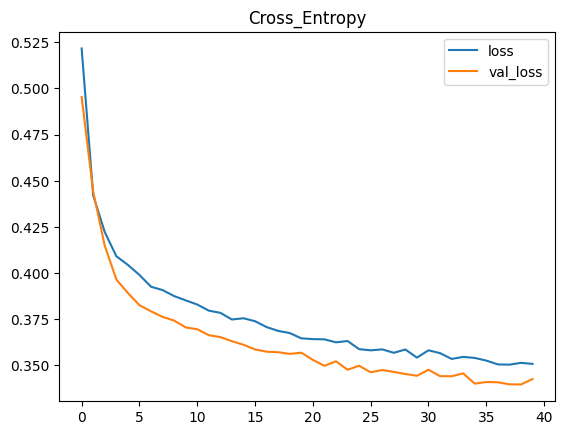

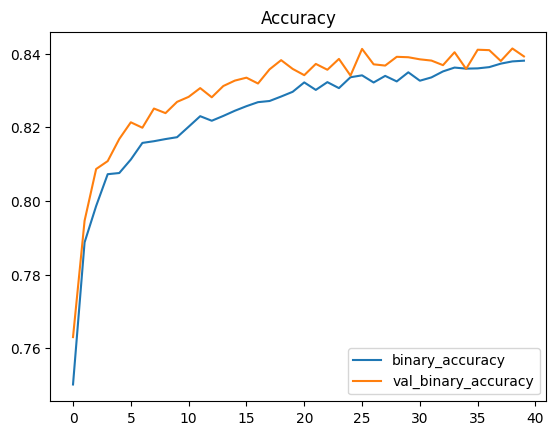

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot(title='Cross_Entropy')
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot(title = 'Accuracy')

Early stopping prevented overfitting, and accuracy rose as cross-entropy fell, so minimizing cross-entropy was a good choice. Overall, the training was a success.